In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy as cp
import dataPrepare as dp
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:

df = pd.read_csv("trainSmall1.csv")
df.head()


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,75c10f333dfdb2,312d33be84f802,f98cefba51a79c,0,0,126.0,2,0,0,56,...,1,0.0,0,0.0,0,0,1463.0,5,1490,0.5000
1,3c9cd47c845b8f,4cfa90a5da9216,cf68f99a6d40fe,0,0,100.0,0,1,2,33,...,1,0.0,0,0.0,0,0,218.3,2,0,0.3333
2,537fae74d33487,a33d482531298a,faed6a22ecb949,0,0,145.0,2,0,0,75,...,0,0.0,0,0.0,1,0,642.9,1,1511,0.2128
3,8fbc99f2b72da6,157ec1680cae7c,49318240e11fe2,0,0,0.0,0,0,2,55,...,0,0.0,0,0.0,0,0,2951.0,5,1500,0.6383
4,15941736eba92d,6bf0b088393514,9fc250a4f0d6d7,0,3,111.3,2,1,14,31,...,0,637.6,0,0.0,0,0,1917.0,3,1491,0.6296


In [4]:
target = df['winPlacePerc']
df.columns


Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [5]:
#Headshot kills % -> (hKills/kills); 
# kills często = 0 -> fill0 , fillMean, MEstimate ((hKills+mean(hKills))/(kills+mean(kills))


headShotKillsPercentFill0 = df['headshotKills']/df['kills']
headShotKillsPercentFill0=headShotKillsPercentFill0.fillna(0)
headShotKillsPercentFill0.head(15)

0     0.000000
1     1.000000
2     0.000000
3     0.000000
4     1.000000
5     0.285714
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
dtype: float64

In [6]:
headShotKillsPercentFill0.corr(df['kills'])

0.3252245165635185

In [7]:
headShotKillsPercentFill0.corr(df['headshotKills'])

0.7301474723758488

In [8]:
headShotKillsPercentFill0.corr(df['winPlacePerc'])

0.17782857926294426

In [9]:
headShotKillsPercentFillMean = df['headshotKills']/df['kills']
naRows = headShotKillsPercentFillMean.isna()

In [10]:
headShotKillsPercentTemp = headShotKillsPercentFillMean[~naRows]
headShotKillsPercentTemp.head(15)

1     1.000000
4     1.000000
5     0.285714
10    0.000000
15    1.000000
16    0.250000
17    0.200000
22    0.000000
28    0.250000
33    0.000000
34    0.000000
36    0.000000
42    0.000000
43    0.000000
44    1.000000
dtype: float64

In [11]:
headShotKillsPercentFillMean=headShotKillsPercentFillMean.fillna(headShotKillsPercentTemp.mean())
headShotKillsPercentFillMean.head(15)

0     0.239224
1     1.000000
2     0.239224
3     0.239224
4     1.000000
5     0.285714
6     0.239224
7     0.239224
8     0.239224
9     0.239224
10    0.000000
11    0.239224
12    0.239224
13    0.239224
14    0.239224
dtype: float64

In [12]:
headShotKillsPercentFillMean.corr(df['kills'])

0.0165143169644671

In [13]:
headShotKillsPercentFillMean.corr(df['headshotKills'])

0.5996455661240464

In [14]:
headShotKillsPercentFillMean.corr(df['winPlacePerc'])

0.006349612669031521

In [15]:
headShotKillsPercentMEstimate = (df['headshotKills']+df['headshotKills'].mean())/(df['kills']+df['kills'].mean())
headShotKillsPercentMEstimate

0         0.245678
1         0.638940
2         0.245678
3         0.245678
4         0.638940
5         0.281072
6         0.245678
7         0.245678
8         0.245678
9         0.245678
10        0.117595
11        0.245678
12        0.245678
13        0.245678
14        0.245678
15        0.638940
16        0.249193
17        0.207086
18        0.245678
19        0.245678
20        0.245678
21        0.245678
22        0.117595
23        0.245678
24        0.245678
25        0.245678
26        0.245678
27        0.245678
28        0.249193
29        0.245678
            ...   
249969    0.117595
249970    0.245678
249971    0.245678
249972    0.057569
249973    0.245678
249974    0.638940
249975    0.038114
249976    0.638940
249977    0.245678
249978    0.245678
249979    0.117595
249980    0.117595
249981    0.245678
249982    0.117595
249983    0.312793
249984    0.057569
249985    0.077297
249986    0.245678
249987    0.245678
249988    0.245678
249989    0.245678
249990    0.

In [16]:
headShotKillsPercentMEstimate.corr(df['kills'])

0.012487111352846882

In [17]:
headShotKillsPercentMEstimate.corr(df['headshotKills'])

0.654421672827563

In [18]:
headShotKillsPercentMEstimate.corr(df['winPlacePerc'])

0.0033567191578407

In [19]:
# pod względem korelacji Fill0 wygląda najlepiej
headShotKillsPercent = headShotKillsPercentFill0

In [20]:
# Poniżej zaprojektowane przez autorów cechy
# Na bazie EDA, znajomości dziedzinowej PUBG oraz doświadczenia i intuicji w grach wideo

# 1st order manual features
# headshotPercent = headshotKills/kills
# poking = damage/kills
# executing = kill/damage
# combatEfficiency = damage/heals
# takedowns = kills + assists + DBNO's
# bonuses = boosts + heals + weaponsAcquired
# totalDistance = walkDistance + rideDistance + swimDistance

# 2nd order manual features
# sharpshooterScore = longest_kill * headShotKillsPercent
# collectorScore = totalDistance * bonuses
# executorScore = executing/totalDistance
# skirmisherScore = totalDistance * takedowns
# camperScore = takedowns/totalDistance
# warlordScore = poking * combatEfficiency

#3rd order manual feature
# adventurerScore = collectorScore * killStreaks

In [21]:
newDfTotalDistance = pd.DataFrame()

# Swim distance i ride są mocno skośne (EDA) -> log transform?

newDfTotalDistance['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance'] 
newDfTotalDistance['logTotalDistance'] = np.log(newDfTotalDistance['totalDistance']+1)
newDfTotalDistance['sqrtTotalDistance'] = np.sqrt(newDfTotalDistance['totalDistance'])
newDfTotalDistance['totalDistanceMixed1'] = (df['walkDistance']) + np.log(df['rideDistance'] + df['swimDistance'] +1)
newDfTotalDistance['totalDistanceMixed2'] = np.sqrt(df['walkDistance']) + np.log(df['rideDistance'] + df['swimDistance'] +1)
newDfTotalDistance.head(15)

,totalDistance,logTotalDistance,sqrtTotalDistance,totalDistanceMixed1,totalDistanceMixed2
0,1463.00,7.288928,38.249183,1463.000000,38.249183
1,218.30,5.390441,14.774979,218.300000,14.774979
2,642.90,6.467543,25.355473,642.900000,25.355473
3,2951.00,7.990238,54.323107,2951.000000,54.323107
4,2554.60,7.846042,50.543051,1923.459278,50.242837
5,2641.00,7.879291,51.390661,2641.000000,51.390661
6,2085.00,7.643004,45.661800,2085.000000,45.661800
7,5062.00,8.529714,71.147734,1781.098643,50.205649
8,2370.00,7.771067,48.682646,2370.000000,48.682646
9,1446.00,7.277248,38.026307,1446.000000,38.026307


skewness:1.827048693877736


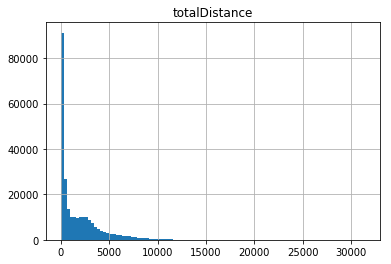

skewness:-0.9305181482545011


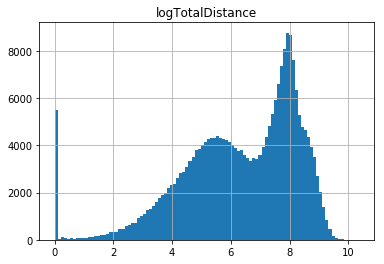

skewness:0.6605331782578491


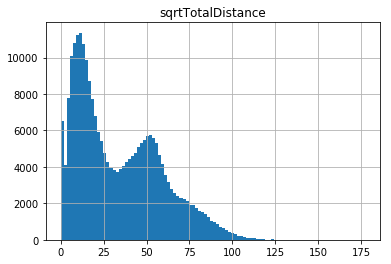

skewness:1.0862497574306418


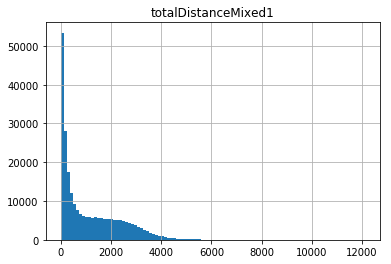

skewness:0.30310509976088806


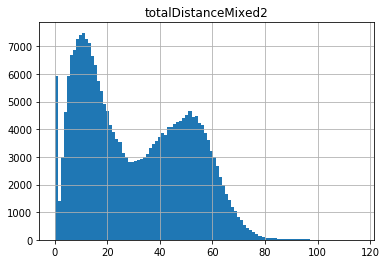

In [22]:
def histogram(newDf):
    for i, column in enumerate(newDf.columns):

        newDf[column].hist(bins=100)
        plt.title(column)
        print("skewness:" +str(newDf[column].skew()))
        plt.show()
histogram(newDfTotalDistance)

In [23]:
# przyjmujemy kolumnę o najmniejszej skośności
# wybór ten może mieć pewne uzasadnienie w interpretacji -> walkDistance powinno przynosić większe zyski niż wysoki rideDistance
# czy swimDistance, ponieważ główny obszar rozgrywki jest po 1. na lądzie, po 2. walki i poszukiwania przeciwników/bonusów
# raczej odbywają się "na piechotę"
# ciekawy obraz zależności dają indeksy 7-8, 2 komórki wyżej
totalDistance = newDfTotalDistance['totalDistanceMixed2']

In [24]:
newDfPoking = pd.DataFrame()

logDmg=np.log(df['damageDealt']+1)
logKills=np.log(df['kills']+1)
newDfPoking['poking'] = (df['damageDealt'])/(df['kills']+1)
newDfPoking['pokingLogLog'] = logDmg/(logKills+1)
newDfPoking['pokingLogNorm'] = logDmg/(df['kills']+1)
newDfPoking['pokingNormLog'] = (df['damageDealt'])/(logKills+1)
newDfPoking.head(15)

,poking,pokingLogLog,pokingLogNorm,pokingNormLog
0,126.0000,4.844187,4.844187,126.000000
1,50.0000,2.725765,2.307560,59.061611
2,145.0000,4.983607,4.983607,145.000000
3,0.0000,0.000000,0.000000,0.000000
4,55.6500,2.788401,2.360587,65.735573
5,85.6375,2.120847,0.816378,222.475404
6,0.0000,0.000000,0.000000,0.000000
7,139.7000,4.946630,4.946630,139.700000
8,103.6000,4.650144,4.650144,103.600000
9,65.7900,4.201553,4.201553,65.790000


skewness:1.4299922162136938


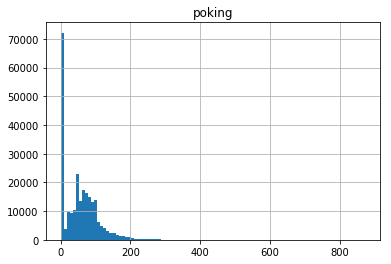

skewness:-0.20437751228781564


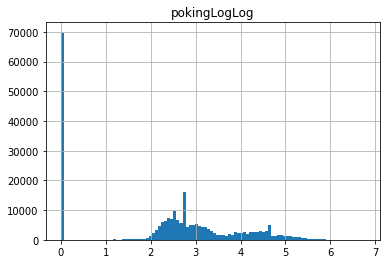

skewness:0.2843497546019762


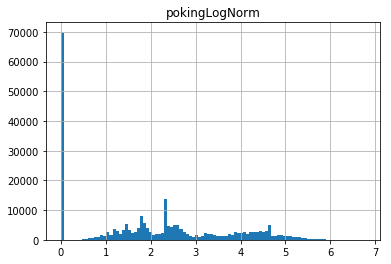

skewness:1.2547168546518672


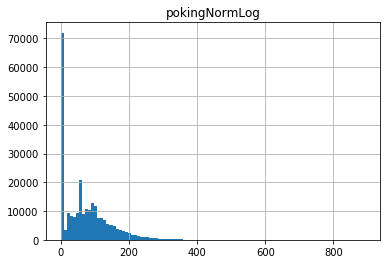

In [25]:
histogram(newDfPoking)

In [26]:
poking = newDfPoking['pokingLogLog']
executing = (logKills)/(logDmg+1)

executing.head(15)

0     0.000000
1     0.123443
2     0.000000
3     0.000000
4     0.121155
5     0.276117
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.110761
11    0.000000
12    0.000000
13    0.000000
14    0.000000
dtype: float64

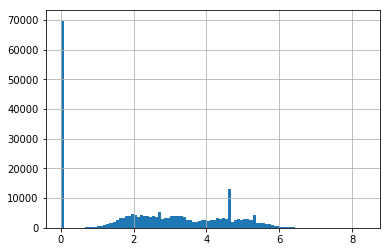

In [27]:


logHeals=np.log(df['heals']+1) #podobna charakterystyka do kills

combatEfficiency =  logDmg/(logHeals+1)

combatEfficiency.hist(bins=100)

In [28]:
takedowns = df['kills'] + df['assists'] + df['DBNOs']
bonuses = df['heals'] + df['boosts'] + df['weaponsAcquired']

In [29]:
logLongestKill = np.log(df['longestKill']+1)
sharpshooterScore = logLongestKill * headShotKillsPercent
sharpshooterScore.head(15)



0     0.000000
1     1.845458
2     0.000000
3     0.000000
4     2.140537
5     1.517213
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
dtype: float64

In [30]:
collectorScore = np.log(totalDistance * bonuses +1)
collectorScore.head(15)

0     5.258775
1     4.096008
2     3.271676
3     5.943486
4     6.913595
5     6.713261
6     6.221146
7     5.864879
8     5.967329
9     5.434411
10    4.574227
11    0.000000
12    6.608017
13    2.694627
14    2.278014
dtype: float64

skewness:26.681952617562768


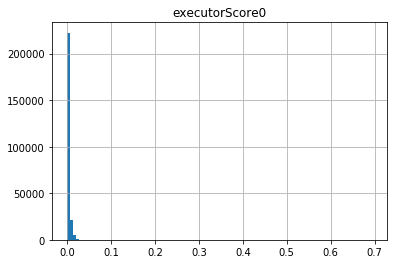

skewness:21.382263336012112


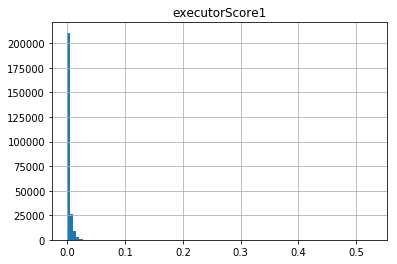

skewness:1.4002651319102724


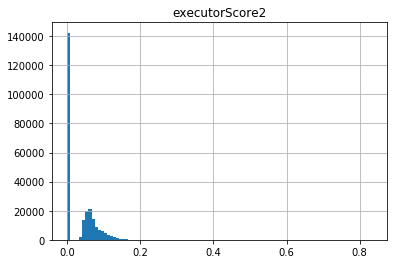

In [31]:
newDfExecutorScore = pd.DataFrame()
newDfExecutorScore['executorScore0'] = executing/(totalDistance+1)
newDfExecutorScore['executorScore1'] = np.log(executing/(totalDistance+1)+1)
newDfExecutorScore['executorScore2'] = np.sqrt(executing/(totalDistance+1))

histogram(newDfExecutorScore)

In [32]:
executorScore = newDfExecutorScore['executorScore2']


skirmisherScore = np.log(totalDistance * takedowns+1)
skirmisherScore.head(15)

0     4.350257
1     2.758425
2     3.945669
3     0.000000
4     5.022093
5     5.888143
6     0.000000
7     0.000000
8     4.588688
9     3.664236
10    4.173906
11    0.000000
12    0.000000
13    0.000000
14    0.000000
dtype: float64

In [33]:
camperScore = takedowns/(totalDistance+1)
camperScore.head(15)

0     0.050956
1     0.063392
2     0.075886
3     0.000000
4     0.058545
5     0.133612
6     0.000000
7     0.000000
8     0.040256
9     0.025624
10    0.060635
11    0.000000
12    0.000000
13    0.000000
14    0.000000
dtype: float64

In [34]:
warlordScore = np.sqrt(poking * combatEfficiency)
warlordScore.head(15)

0     4.844187
1     2.448328
2     4.983607
3     0.000000
4     1.884212
5     2.409258
6     0.000000
7     4.946630
8     4.650144
9     4.201553
10    4.040867
11    0.000000
12    2.501676
13    0.000000
14    0.000000
dtype: float64

In [35]:
adventurerScore = collectorScore * df['killStreaks']
adventurerScore.head(15)

0     0.000000
1     4.096008
2     0.000000
3     0.000000
4     6.913595
5     6.713261
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    4.574227
11    0.000000
12    0.000000
13    0.000000
14    0.000000
dtype: float64

In [51]:
# 1st order manual features
# headshotPercent = headshotKills/kills
# poking = damage/kills
# executing = kill/damage
# combatEfficiency = damage/heals
# takedowns = kills + assists + DBNO's
# bonuses = boosts + heals + weaponsAcquired
# totalDistance = walkDistance + rideDistance + swimDistance

# 2nd order manual features
# sharpshooterScore = longest_kill * headShotKillsPercent
# collectorScore = totalDistance * bonuses
# executorScore = executing/totalDistance
# skirmisherScore = totalDistance * takedowns
# camperScore = takedowns/totalDistance
# warlordScore = poking * combatEfficiency

#3rd order manual feature
# adventurerScore = collectorScore * killStreaks

featuresNew = ['base', headShotKillsPercent, poking, executing, combatEfficiency, takedowns, bonuses, totalDistance, sharpshooterScore,
           collectorScore, executorScore, skirmisherScore, camperScore, warlordScore, adventurerScore]


def createModel(k):
    return GradientBoostingRegressor(n_estimators=k)

#features = dp.bestFeatures(createModel(10), df, dp.categorical_cols, None)
features = ['DBNOs', 'killPlace', 'kills', 'matchDuration', 'numGroups', 'walkDistance']
print(features)
df2 = df[features]
df2[dp.target] = df[dp.target]

for ind,feature in enumerate(featuresNew):
    if ind !=0:
        dfx = df2.assign(feature=feature)
    else:
        dfx = df2.copy()
    dfx = dfx.dropna()
    #dfx = dfx.drop(columns=dp.categorical_cols)
    x_train, y_train, x_test, y_test = dp.get_train_valid_sets(dfx)
    clf = GradientBoostingRegressor(n_estimators=60)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    error = mean_absolute_error(y_test,y_pred) #calculate err
    if ind==0:
        errBase = error
        print('MAE value for baseline is:             {0:.5f}'.format(error))
    else:
        print('MAE value for feature at index {0} is:   {1:.5f}  , improved by   {2:.5f}'.format(ind, error, errBase-error))


['DBNOs', 'killPlace', 'kills', 'matchDuration', 'numGroups', 'walkDistance']


c:\users\piotr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


MAE value for baseline is:             0.07425
MAE value for feature at index 1 is:   0.07425  , improved by   0.00000
MAE value for feature at index 2 is:   0.07425  , improved by   -0.00000
MAE value for feature at index 3 is:   0.07398  , improved by   0.00027
MAE value for feature at index 4 is:   0.07423  , improved by   0.00003
MAE value for feature at index 5 is:   0.07421  , improved by   0.00004
MAE value for feature at index 6 is:   0.07316  , improved by   0.00109
MAE value for feature at index 7 is:   0.07372  , improved by   0.00053
MAE value for feature at index 8 is:   0.07425  , improved by   0.00000
MAE value for feature at index 9 is:   0.07279  , improved by   0.00146
MAE value for feature at index 10 is:   0.07388  , improved by   0.00037
MAE value for feature at index 11 is:   0.07391  , improved by   0.00034
MAE value for feature at index 12 is:   0.07423  , improved by   0.00002
MAE value for feature at index 13 is:   0.07400  , improved by   0.00025
MAE value fo

In [45]:
#wybieramy cechy o zysku > 0.00020

# Team features

# TeamSize
# TeamKills
# TeamTakedowns
# TeamDamage
# TeamAssists
# TeamWalkDistanceMean
# TeamTotalRevives
# TeamTotalBonuses
# TeamMeanRankPoints

# Teamwork = TeamAssists/TeamKills

workDf = df.copy()
workDf['takedowns'] = takedowns
workDf['bonuses'] = bonuses
groupedDf = workDf.groupby('groupId')
newDfTeam = pd.DataFrame()
teamSize = groupedDf.size().rename('TeamSize')
teamKills = groupedDf['kills'].sum().rename('TeamKills')
teamTakedowns = groupedDf['takedowns'].sum().rename('TeamTakedowns')
teamDamage = groupedDf['damageDealt'].sum().rename('TeamDamage')
teamAssists = groupedDf['assists'].sum().rename('TeamAssists')
TeamWalkDistanceMean = groupedDf['walkDistance'].mean().rename('TeamWalkDistanceMean')
TeamTotalRevives = groupedDf['revives'].sum().rename('TeamTotalRevives')
TeamTotalBonuses = groupedDf['bonuses'].sum().rename('TeamTotalBonuses')
TeamMeanRankPoints = groupedDf['rankPoints'].mean().rename('TeamMeanRankPoints')
Teamwork = (teamAssists/(teamKills+1)).rename('Teamwork')
newDfTeam['TeamSize'] = teamSize
newDfTeam['TeamKills'] = teamKills
newDfTeam['TeamTakedowns'] = teamTakedowns
newDfTeam['TeamDamage'] = teamDamage
newDfTeam['TeamAssists'] = teamAssists
newDfTeam['TeamWalkDistanceMean'] = TeamWalkDistanceMean
newDfTeam['TeamTotalRevives'] = TeamTotalRevives
newDfTeam['TeamTotalBonuses'] = TeamTotalBonuses
newDfTeam['TeamMeanRankPoints'] = TeamMeanRankPoints
newDfTeam['Teamwork'] = Teamwork
workDf.drop(columns=df.columns).assign(groupId=df['groupId']).join(newDfTeam, on='groupId') 

,takedowns,bonuses,groupId,TeamSize,TeamKills,TeamTakedowns,TeamDamage,TeamAssists,TeamWalkDistanceMean,TeamTotalRevives,TeamTotalBonuses,TeamMeanRankPoints,Teamwork
0,2,5,312d33be84f802,1,0,2,126.00,0,1463.000,1,5,-1.0,0.000000
1,1,4,4cfa90a5da9216,1,1,1,100.00,0,218.300,1,4,1420.0,0.000000
2,2,1,a33d482531298a,1,0,2,145.00,0,642.900,0,1,-1.0,0.000000
3,0,7,157ec1680cae7c,1,0,0,0.00,0,2951.000,0,7,-1.0,0.000000
4,3,20,6bf0b088393514,1,1,3,111.30,0,1917.000,0,20,-1.0,0.000000
5,7,16,0310194f0beb21,1,7,7,685.10,0,2641.000,0,16,-1.0,0.000000
6,0,11,ae3394dc211a18,1,0,0,0.00,0,2085.000,0,11,1469.0,0.000000
7,0,7,cf567a60174e1e,1,0,0,139.70,0,1773.000,0,7,1507.0,0.000000
8,2,8,307232d29befa6,1,0,2,103.60,2,2370.000,2,8,-1.0,2.000000
9,1,6,2e899451072441,1,0,1,65.79,0,1446.000,0,6,1497.0,0.000000


In [52]:
featuresNew = ['base', teamSize, teamKills, teamTakedowns, teamDamage, teamAssists, TeamWalkDistanceMean, TeamTotalRevives, 
               TeamTotalBonuses, TeamMeanRankPoints, Teamwork]


def createModel(k):
    return GradientBoostingRegressor(n_estimators=k)

#features = dp.bestFeatures(createModel(10), df, dp.categorical_cols, None)
features = ['DBNOs', 'killPlace', 'kills', 'matchDuration', 'numGroups', 'walkDistance', 'groupId']
print(features)
df2 = df[features]
df2[dp.target] = df[dp.target]

for ind,feature in enumerate(featuresNew):
    if ind !=0:
        dfx = df2.join(feature, on='groupId')
        
    else:
        dfx = df2.copy()
    dfx = dfx.drop(columns=['groupId'])
    dfx = dfx.dropna()
    #dfx = dfx.drop(columns=dp.categorical_cols)
    x_train, y_train, x_test, y_test = dp.get_train_valid_sets(dfx)
    clf = GradientBoostingRegressor(n_estimators=60)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    error = mean_absolute_error(y_test,y_pred) #calculate err
    if ind==0:
        errBase = error
        print('MAE value for baseline is:             {0:.5f}'.format(error))
    else:
        print('MAE value for feature at index {0} is:   {1:.5f}  , improved by   {2:.5f}'.format(ind, error, errBase-error))


['DBNOs', 'killPlace', 'kills', 'matchDuration', 'numGroups', 'walkDistance', 'groupId']


c:\users\piotr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


MAE value for baseline is:             0.07425
MAE value for feature at index 1 is:   0.07425  , improved by   0.00000
MAE value for feature at index 2 is:   0.07402  , improved by   0.00023
MAE value for feature at index 3 is:   0.07391  , improved by   0.00034
MAE value for feature at index 4 is:   0.07411  , improved by   0.00014
MAE value for feature at index 5 is:   0.07377  , improved by   0.00048
MAE value for feature at index 6 is:   0.07365  , improved by   0.00060
MAE value for feature at index 7 is:   0.07415  , improved by   0.00011
MAE value for feature at index 8 is:   0.07410  , improved by   0.00015
MAE value for feature at index 9 is:   0.07402  , improved by   0.00023
MAE value for feature at index 10 is:   0.07381  , improved by   0.00044


In [54]:
# wybieramy cechy o zysku > 0.00020 z obu testów

def getFeatures(df):
    logDmg=np.log(df['damageDealt']+1)
    logKills=np.log(df['kills']+1)
    poking = logDmg / (logKills + 1)
    logHeals = np.log(df['heals'] + 1)  # podobna charakterystyka do kills
    combatEfficiency = logDmg / (logHeals + 1)
    
    executing = (logKills)/(logDmg+1)
    takedowns = df['kills'] + df['assists'] + df['DBNOs']
    bonuses = df['heals'] + df['boosts'] + df['weaponsAcquired']
    totalDistance = np.sqrt(df['walkDistance']) + np.log(df['rideDistance'] + df['swimDistance'] +1)
    collectorScore = np.log(totalDistance * bonuses +1)
    executorScore = np.sqrt(executing/(totalDistance+1))
    skirmisherScore = np.log(totalDistance * takedowns+1)
    warlordScore = np.sqrt(poking * combatEfficiency)
    adventurerScore = collectorScore * df['killStreaks']
    
    f1 = [executing, takedowns, bonuses, totalDistance, collectorScore, executorScore, skirmisherScore, 
          warlordScore, adventurerScore]
    
    for ind,feat in enumerate(f1):
        df['f1_'+str(ind)]=feat
    
    groupedDf = df.groupby('groupId')
    teamKills = groupedDf['kills'].sum().rename('TeamKills')
    teamTakedowns = groupedDf['takedowns'].sum().rename('TeamTakedowns')
    teamAssists = groupedDf['assists'].sum().rename('TeamAssists')
    TeamWalkDistanceMean = groupedDf['walkDistance'].mean().rename('TeamWalkDistanceMean')
    TeamMeanRankPoints = groupedDf['rankPoints'].mean().rename('TeamMeanRankPoints')
    Teamwork = (teamAssists/(teamKills+1)).rename('Teamwork')
    
    f2 = [teamKills, teamTakedowns, teamAssists, TeamWalkDistanceMean, TeamMeanRankPoints, Teamwork]
    
    for ind,feat in enumerate(f2):
        df = df.join(feat, on='groupId')
    return df
    

In [ ]:
# Match-Team features -> Można przetestować w przyszłości

# Team Percentage of damage in match
# Team Percentage of total distance in match
# Team Percentage of total bonuses in match
# Difference between match mean rank and Team mean rank